In [2]:
!chdir
!dir

C:\Users\Cayetano\Desktop\TFM Offline
 El volumen de la unidad C es OS
 El n£mero de serie del volumen es: 8897-90A5

 Directorio de C:\Users\Cayetano\Desktop\TFM Offline

17/07/2023  08:11    <DIR>          .
17/07/2023  08:11    <DIR>          ..
12/05/2023  12:50            19.429 .ipynb
17/07/2023  08:08    <DIR>          .ipynb_checkpoints
22/06/2023  12:49         2.170.176 3d_dBm.png
22/06/2023  12:49         2.145.765 3d_mW.png
07/06/2023  10:26            25.776 antenna.png
06/06/2023  14:00               469 atmosphere.ps1
26/06/2023  08:21           843.542 atm_total.png
22/06/2023  12:32           660.067 atm_w.png
26/06/2023  08:21           509.040 atm_zenith.png
23/06/2023  08:38    <DIR>          Chapters
06/06/2023  10:39               441 def
22/06/2023  12:07         3.371.177 dual.png
22/06/2023  12:49         2.170.176 dual_dBm.png
22/06/2023  12:16         3.374.830 dual_mW.png
26/06/2023  12:06           868.955 esquema.pdf
23/06/2023  06:37           451.344 esq

In [3]:
voltages = np.arange(0.8, 4.9, 0.1) #V
freq = np.arange(12.5, 18.3, 0.1) #GHz; el sinte no admite un paso más fino.

Power = np.zeros([len(voltages), len(freq)])
Powerf =  np.zeros([len(freq), len(voltages)])

for i, V in enumerate(voltages):
    V = int(10*V)
    file = f"PS_Results_{V}V_10_dBm.npy"
    [f, Power[i,:]] = np.load(file)
    [f, Powerf[:,i]] = np.load(file)

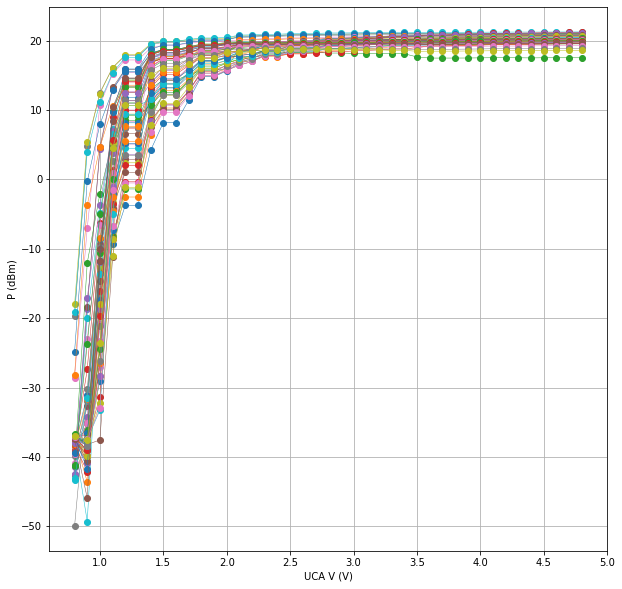

In [4]:
plt.figure(figsize = [10, 10])
plt.plot(voltages, Power, lw = 0.5, marker = 'o')
plt.xlabel("UCA V (V)")
plt.ylabel("P (dBm)")
plt.grid()
plt.show()

Averaging over 7 frecuencies.


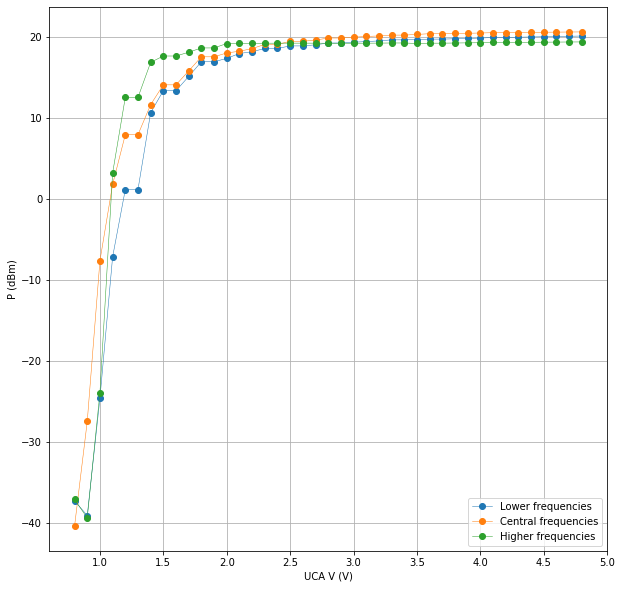

In [5]:
plt.figure(figsize = [10, 10])

num_sums = round(len(f)*(1/8))
print("Averaging over", num_sums, "frecuencies.")

PowerL = 0
PowerC = 0
PowerR = 0

for i in range(num_sums):
    # PowerL calculation
    PowerL += Powerf[i]

    # PowerC calculation
    mid_idx = round(len(f) / 2)
    PowerC += Powerf[mid_idx - num_sums + i]

    # PowerR calculation
    PowerR += Powerf[len(f) - num_sums + i]

# Divide the sums by the number of terms to get the averages
PowerL /= num_sums
PowerC /= num_sums
PowerR /= num_sums

for i in [0]:
    plt.plot(voltages, PowerL, lw = 0.5, marker = 'o', label = "Lower frequencies")
    plt.plot(voltages, PowerC, lw = 0.5, marker = 'o', label = "Central frequencies")
    plt.plot(voltages, PowerR, lw = 0.5, marker = 'o', label = "Higher frequencies")
    
plt.xlabel("UCA V (V)")
plt.ylabel("P (dBm)")
plt.grid()
plt.legend()
plt.show()

Averaging over 7 frecuencies.


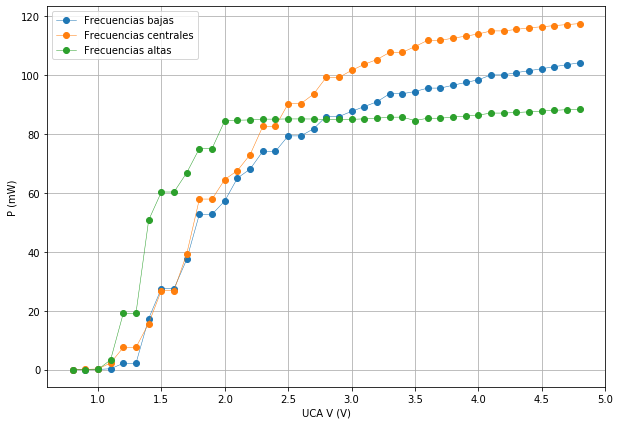

In [6]:
plt.figure(figsize = [10, 7])

num_sums = round(len(f)*(1/8))
print("Averaging over", num_sums, "frecuencies.")

PowerfmW = 10**(Powerf*(1/10))

PowerLmW = 0
PowerCmW = 0
PowerRmW = 0

for i in range(num_sums):
    # PowerL calculation
    PowerLmW += PowerfmW[i]

    # PowerC calculation
    mid_idx = round(len(f) / 2)
    PowerCmW += PowerfmW[mid_idx - num_sums + i]

    # PowerR calculation
    PowerRmW += PowerfmW[len(f) - num_sums + i]

# Divide the sums by the number of terms to get the averages
PowerLmW /= num_sums
PowerCmW /= num_sums
PowerRmW /= num_sums

for i in [0]:
    plt.plot(voltages, PowerLmW, lw = 0.5, marker = 'o', label = "Frecuencias bajas")
    plt.plot(voltages, PowerCmW, lw = 0.5, marker = 'o', label = "Frecuencias centrales")
    plt.plot(voltages, PowerRmW, lw = 0.5, marker = 'o', label = "Frecuencias altas")
    
plt.xlabel("UCA V (V)")
plt.ylabel("P (mW)")
plt.grid()
plt.legend()
# plt.title('Potencia emitida por el multiplicador para distintos valores de potencial en la UCA')
plt.savefig('PvsV.png', dpi=400, bbox_inches='tight')
plt.show()

## We model as a $a-b\cdot x^{c}$ because we know that the tendency is to approach a certain $a$, which is the value with no attenuation.

Fitted Parameters:
a = 20.17
b = 29.96
c = -0.14
Chi-square value: 0.06


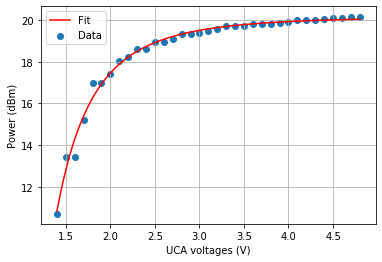

Fitted Parameters:
a = 20.82
b = 27.11
c = -0.15
Chi-square value: 0.05


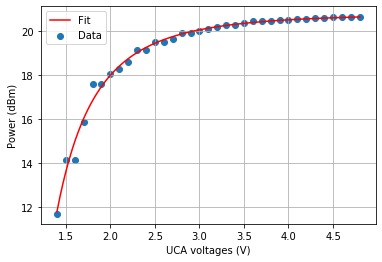

Fitted Parameters:
a = 19.40
b = 20.27
c = -0.09
Chi-square value: 0.16


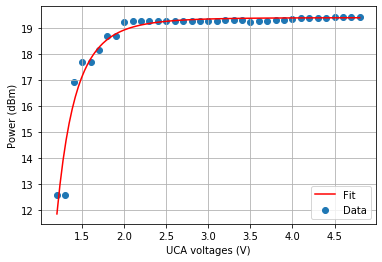

In [7]:
for P in [PowerL, PowerC, PowerR]:
    PowerCasePrime = P
    voltagesCasePrime = voltages

    PowerCase = PowerCasePrime[np.argmax(PowerCasePrime > 10):]
    voltagesCase = voltagesCasePrime[np.argmax(PowerCasePrime > 10):]
    
    # This following delimited section is the one to give
    # ChatGPT with the following prompt:
    
    # --------------------------------------------------
    # Define the function to fit
    def func(x, a, b, c):
        return a - b*(x)**(1/(2*c))

    # Perform the curve fit
    popt, pcov = curve_fit(func, voltagesCase, PowerCase)

    # Extract the fitted parameters
    a_fit, b_fit, c_fit = popt

    # Print the fitted parameters with two significant digits
    print("Fitted Parameters:")
    print("a = {:.2f}".format(a_fit))
    print("b = {:.2f}".format(b_fit))
    print("c = {:.2f}".format(c_fit))

    # Generate the curve based on the fitted parameters
    voltages_fit = np.linspace(min(voltagesCase), max(voltagesCase), 100)
    Power_fit = func(voltages_fit, a_fit, b_fit, c_fit)

    # Calculate the residuals
    residuals = PowerCase - func(voltagesCase, a_fit, b_fit, c_fit)
    # --------------------------------------------------

    # Calculate the residual sum of squares (RSS)
    rss = np.sum(residuals**2)

    # Calculate the degrees of freedom (DOF)
    dof = len(voltagesCase) - len(popt)

    # Calculate the chi-square value
    chisq = rss / dof

    # Print the chi-square value with two significant digits
    print("Chi-square value: {:.2f}".format(chisq))

    # Plot the original data and the fitted curve
    plt.figure()
    plt.scatter(voltagesCase, PowerCase, label='Data')
    plt.plot(voltages_fit, Power_fit, 'r-', label='Fit')
    plt.xlabel('UCA voltages (V)')
    plt.ylabel('Power (dBm)')
    plt.grid(which = "both")
    plt.legend()

    plt.show()

Fitted Parameters:
a = 117.65
b = 193.69
c = -0.59
Chi-square value: 5.20


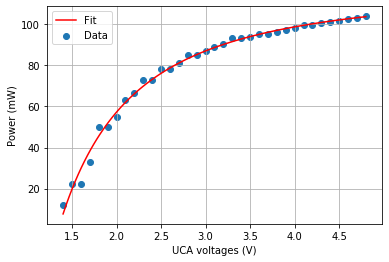

Fitted Parameters:
a = 136.32
b = 218.29
c = -0.62
Chi-square value: 7.57


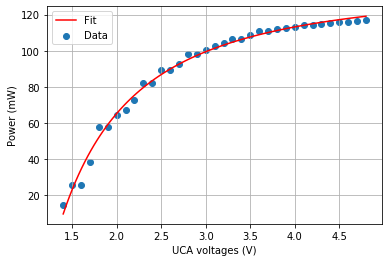

Fitted Parameters:
a = 87.46
b = 160.64
c = -0.25
Chi-square value: 11.97


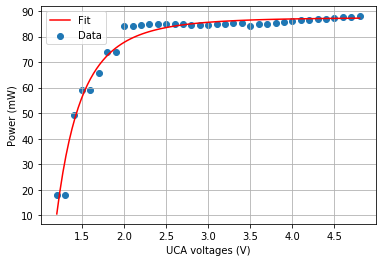

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

for P in [PowerL, PowerC, PowerR]:
    PowerCasePrime = P
    voltagesCasePrime = voltages

    PowerCase = 10**(PowerCasePrime[np.argmax(PowerCasePrime > 10):]*(1/10))
    voltagesCase = voltagesCasePrime[np.argmax(PowerCasePrime > 10):]
    
    # This following delimited section is the one to give
    # ChatGPT with the following prompt:
    
    # --------------------------------------------------
    # Define the function to fit
    def func(x, a, b, c):
        return a - b*x**(1/c)

    # Perform the curve fit
    popt, pcov = curve_fit(func, voltagesCase, PowerCase)

    # Extract the fitted parameters
    a_fit, b_fit, c_fit = popt

    # Print the fitted parameters with two significant digits
    print("Fitted Parameters:")
    print("a = {:.2f}".format(a_fit))
    print("b = {:.2f}".format(b_fit))
    print("c = {:.2f}".format(c_fit))

    # Generate the curve based on the fitted parameters
    voltages_fit = np.linspace(min(voltagesCase), max(voltagesCase), 100)
    Power_fit = func(voltages_fit, a_fit, b_fit, c_fit)

    # Calculate the residuals
    residuals = PowerCase - func(voltagesCase, a_fit, b_fit, c_fit)
    # --------------------------------------------------

    # Calculate the residual sum of squares (RSS)
    rss = np.sum(residuals**2)

    # Calculate the degrees of freedom (DOF)
    dof = len(voltagesCase) - len(popt)

    # Calculate the chi-square value
    chisq = rss / dof

    # Print the chi-square value with two significant digits
    print("Chi-square value: {:.2f}".format(chisq))

    # Plot the original data and the fitted curve
    plt.figure()
    plt.scatter(voltagesCase, PowerCase, label='Data')
    plt.plot(voltages_fit, Power_fit, 'r-', label='Fit')
    plt.xlabel('UCA voltages (V)')
    plt.ylabel('Power (mW)')
    plt.grid(which = "both")
    plt.legend()

    plt.show()

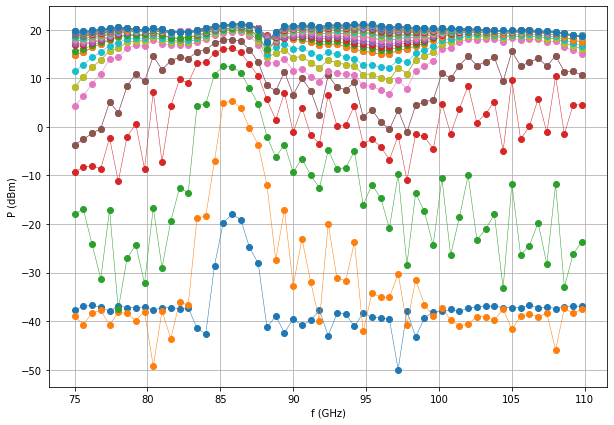

In [9]:
plt.figure(figsize = [10, 7])
plt.plot(f*6, Powerf, lw = 0.5, marker = 'o')
plt.xlabel("f (GHz)")
plt.ylabel("P (dBm)")
# plt.axhline(30)
plt.grid(which = "both")
# plt.legend(voltages)
# plt.title('Potencia emitida por el multiplicador para distintos valores de UCA en la banda')
plt.savefig('PdBmvsf.png', dpi=300, bbox_inches='tight')
plt.show()

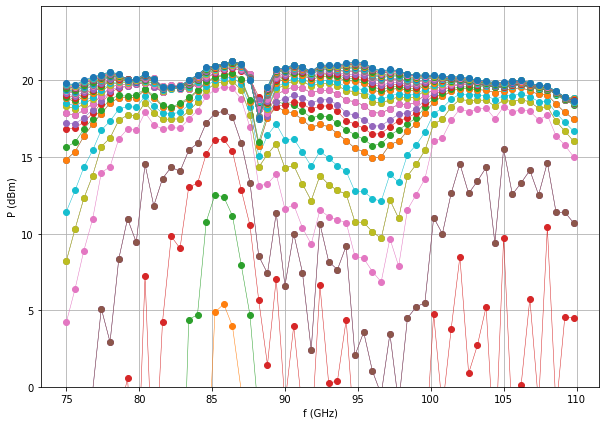

In [10]:
plt.figure(figsize = [10, 7])
plt.plot(f*6, Powerf, lw = 0.5, marker = 'o')
plt.xlabel("f (GHz)")
plt.ylabel("P (dBm)")
# plt.axhline(30)
plt.grid(which = "both")
# plt.legend(voltages)
plt.ylim(bottom=0)  # Set y-limit to 0
# plt.title('Potencia emitida por el multiplicador para distintos valores de UCA en la banda')
plt.savefig('PdBmvsf_bounded.png', dpi=300, bbox_inches='tight')
plt.show()

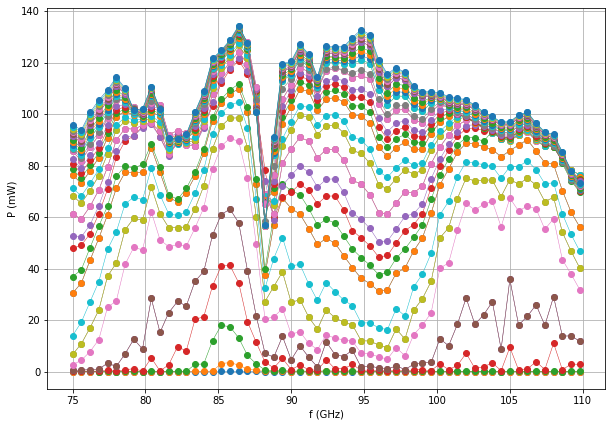

In [11]:
plt.figure(figsize = [10, 7])
plt.plot(f*6, 10**(Powerf/10), lw = 0.5, marker = 'o')
plt.xlabel("f (GHz)")
plt.ylabel("P (mW)")
# plt.axhline(10**(30/10))
plt.grid(which = "both")
# plt.legend(voltages)
# plt.title('Potencia emitida por el multiplicador para distintos valores de UCA en la banda')
plt.savefig('PmWvsf.png', dpi=300, bbox_inches='tight')
plt.show()

## The interesting thing here is the contour line because is the one that indicates how to emit in every frequency with the same intensity, so the SNR is constant and else more predictable for the GB telescope.

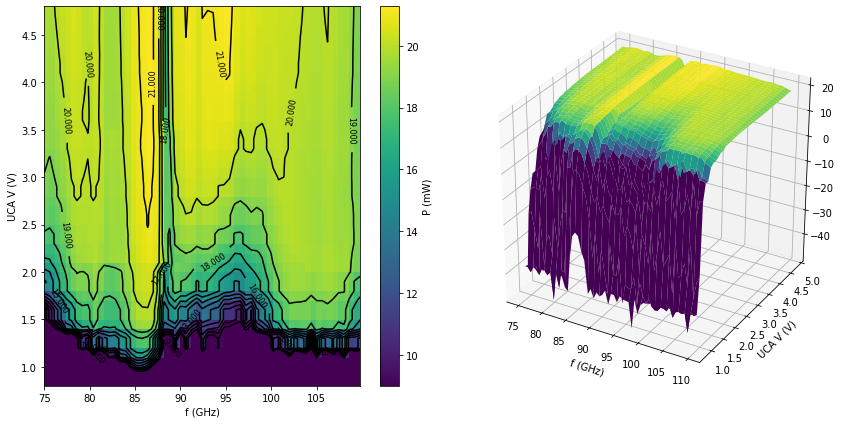

In [12]:
# Create a meshgrid from f and voltages for the pcolormesh plot
F, Voltages = np.meshgrid(6*f, voltages)
Power_mesh = Power.reshape(Voltages.shape)

# Create the colormap plot
plt.figure(figsize=(12, 6))

# First subplot - pcolormesh
plt.subplot(1, 2, 1)
plt.pcolormesh(F, Voltages, Power_mesh, shading='auto', cmap='viridis', vmin = 9)
plt.colorbar(label='P (mW)')

# Define the contour levels, the last argument is the distance between contour lines, in dBm.
contour_levels = np.arange(9, 30, 1)
CS = plt.contour(F, Voltages, Power_mesh, levels=contour_levels, colors='black')
plt.clabel(CS, inline=True, fontsize=8)

plt.xlabel('f (GHz)')
plt.ylabel('UCA V (V)')
# plt.title('P (dBm)')

# Second subplot - 3D surface plot
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(F, Voltages, Power_mesh, cmap='viridis', vmin = 9)
plt.xlabel('f (GHz)')
plt.ylabel('UCA V (V)')
# plt.title('P (dBm)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.savefig('dual_dBm.png', dpi=800, bbox_inches='tight')
plt.show()

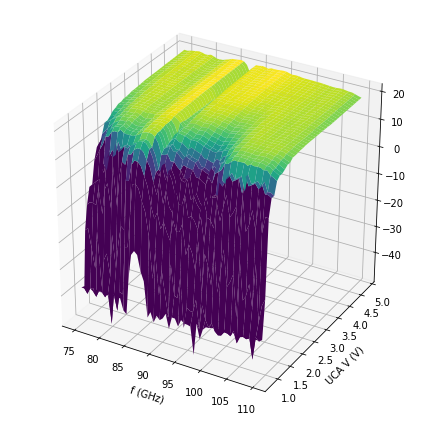

In [13]:
# Create a meshgrid from f and voltages for the pcolormesh plot
F, Voltages = np.meshgrid(6*f, voltages)
Power_mesh = Power.reshape(Voltages.shape)

# Create the colormap plot
plt.figure(figsize=(12, 6))

ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(F, Voltages, Power_mesh, cmap='viridis', vmin = 9)
plt.xlabel('f (GHz)')
plt.ylabel('UCA V (V)')
# plt.title('P (dBm)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.savefig('3d_dBm.png', dpi=800, bbox_inches='tight')
plt.show()

## Now in mW

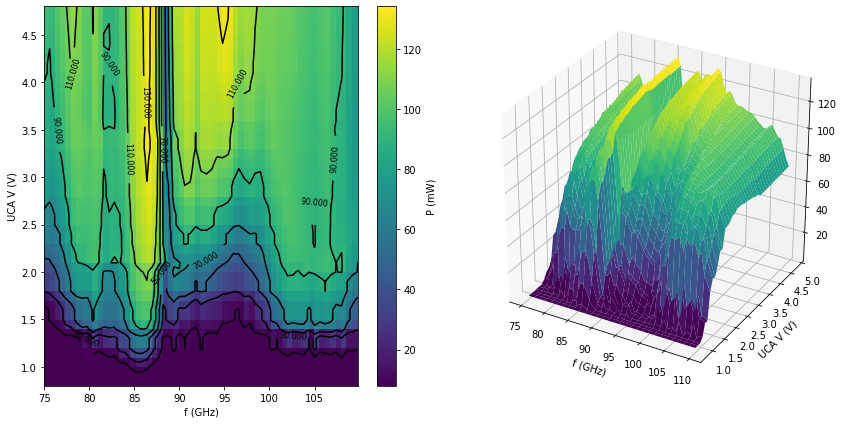

In [14]:
# Create a meshgrid from f and voltages for the pcolormesh plot
F, Voltages = np.meshgrid(6*f, voltages)
Power_mesh = 10**(Power.reshape(Voltages.shape)/10)

# Create the colormap plot
plt.figure(figsize=(12, 6))

# First subplot - pcolormesh
plt.subplot(1, 2, 1)
plt.pcolormesh(F, Voltages, Power_mesh, shading='auto', cmap='viridis', vmin = 10**(9/10))
plt.colorbar(label='P (mW)')

# Define the contour levels, the last argument is the distance between lines, in mW.
contour_levels = np.arange(10**(10/10), 10**(25/10), 20)
CS = plt.contour(F, Voltages, Power_mesh, levels=contour_levels, colors='black')
plt.clabel(CS, inline=True, fontsize=8)

plt.xlabel('f (GHz)')
plt.ylabel('UCA V (V)')
# plt.title('P (mW)')

# Second subplot - 3D surface plot
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(F, Voltages, Power_mesh, cmap='viridis', vmin = 10**(10/10))
plt.xlabel('f (GHz)')
plt.ylabel('UCA V (V)')
# plt.title('P (mW)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.savefig('dual_mW.png', dpi=800, bbox_inches='tight')
plt.show()

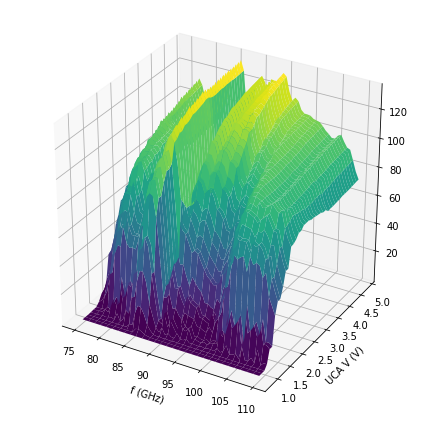

In [15]:
# Create a meshgrid from f and voltages for the pcolormesh plot
F, Voltages = np.meshgrid(6*f, voltages)
Power_mesh = 10**(Power.reshape(Voltages.shape)/10)

# Create the colormap plot
plt.figure(figsize=(12, 6))

# 3D surface plot
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(F, Voltages, Power_mesh, cmap='viridis', vmin = 10**(10/10))
plt.xlabel('f (GHz)')
plt.ylabel('UCA V (V)')
# plt.title('P (mW)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.savefig('3d_mW.png', dpi=800, bbox_inches='tight')
plt.show()